In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random as rd
import pandas as pd
from sympy import *

data generaotor

In [ ]:
def data_generator(n,d,var):
  if d<1: 
    return 
  std = var ** 0.5
  data = []

  for i in range(n):  
    temp = [np.random.normal(loc=0,scale=1)]       #X_1
    temp.append(temp[0]+np.random.normal(loc=0,scale=std)) #X_2
    temp.append(temp[0]+np.random.normal(loc=0,scale=std)) #X_3
    temp.append(temp[0]+np.random.normal(loc=0,scale=std)) #X_4
    for i in range(4,d):  #X_i
      temp.append(temp[i-3]+np.random.normal(loc=0,scale=std))
    data.append(temp)

  return np.array(data)

1. Auto-Encoders

In [ ]:
def tanh(z): 
  sigma = (np.exp(z)-np.exp(-z)) / (np.exp(z)+np.exp(-z))
  return sigma

def tanh_derivative(z): 
  sigma_prime = (4 * np.exp(2*z)) / ((np.exp(2*z) + 1) ** 2)
  return sigma_prime

def updateGD(alpha,d,k,w_old,v_old,X,Y,Out): # d = 30,k = number of inner nodes
  temp = 2 * (Out-X)

  v_new = np.ones((d,k+1))
  for i in range(d):
    for j in range(k+1):
      v_new[i][j] = v_old[i][j] - alpha * temp[i+1] * Y[j]
                                           
  w_new = np.ones((k,d+1))
  for i in range(k):
    temp_d = alpha * (temp[1:].dot(v_new[:,i])) * X * tanh_derivative(w_old[i].dot(X))
    for j in range(d+1):
      w_new[i][j] = w_old[i][j] - temp_d[j]
  
  return w_new, v_new

In [ ]:
def AELoss(data,w,v,d,k):
  loss = 0
  n = len(data)
  Y = np.ones(k+1)
  Out = np.ones(d+1)
  for i in range(n):
    for m in range(k):
      Y[m+1] = tanh(w[m].dot(data[i]))
    for n in range(d):
      #print(v_start[n],Y)
      Out[n+1] = v[n].dot(Y)
      #print(X_test[i] - Out)
    loss += np.linalg.norm(data[i][1:] - Out[1:]) ** 2
  #print(loss/n)
  return loss/n

In [ ]:
def findSGD3(w_start,v_start,X,alpha,k):
  Length = len(X)
  d = len(X[0])-1
  w_current = w_start
  v_current = v_start

  Y = np.ones(k+1)
  Out = np.ones(d+1)
  Loss = []
  W = []
  V = []

  for i in range(Length): 
    #print('start ',i)
    for m in range(k):
      Y[m+1] = tanh(w_current[m].dot(X[i]))
    for n in range(d):
      #print(v_start[n],Y)
      Out[n+1] = v_current[n].dot(Y)
    Loss.append(np.linalg.norm(X[i] - Out))
    W.append(w_current)
    V.append(v_current)

    w_next,v_next = updateGD(alpha,d,k,w_current,v_current,X[i],Y,Out)
    w_current = w_next
    v_current = v_next
  index = Loss.index(min(Loss))
  #print(index,Loss[index])
  #plt.plot(Loss)
  return W[index], V[index]

In [ ]:
X = data_generator(5000,30,0.1)
X = np.hstack((np.ones((5000,1)),X))
X_test = data_generator(500,30,0.1)
X_test = np.hstack((np.ones((500,1)),X_test))
d = 30

#k = 6
alpha = 0.00001

Loss = []
for j in range(30):
  k = j+1
  print('start k = ',k)
  w = np.zeros((k,d+1))
  v = np.ones((d,k+1))
  w,v = findSGD3(w,v,X,alpha,k)
  #print('w=',w,'v=',v)
  loss = AELoss(X_test,w,v,d,k)
  Loss.append(loss)

start k =  1
start k =  2
start k =  3
start k =  4
start k =  5
start k =  6
start k =  7
start k =  8
start k =  9
start k =  10
start k =  11
start k =  12
start k =  13
start k =  14
start k =  15
start k =  16
start k =  17
start k =  18
start k =  19
start k =  20
start k =  21
start k =  22
start k =  23
start k =  24
start k =  25
start k =  26
start k =  27
start k =  28
start k =  29
start k =  30


[556.4749859294127, 289.9057032150367, 231.57617124929212, 215.49470497411883, 210.55381652167054, 208.630741947031, 207.7538588631323, 207.30366854042737, 207.05158494470103, 206.90117138362456, 206.80706496336043, 206.74599703940405, 206.7051929614844, 206.6772579232527, 206.65773041310055, 206.64382883478666, 206.63377189322762, 206.6263926032205, 206.6209107193073, 206.61679450764248, 206.6136747788372, 206.61129043045543, 206.60945348565113, 206.60802648426233, 206.60690788289511, 206.6060227552402, 206.60531702568295, 206.604753978495, 206.6043120163902, 206.60398269733025]


Text(0.5, 1.0, 'var = 0.1')

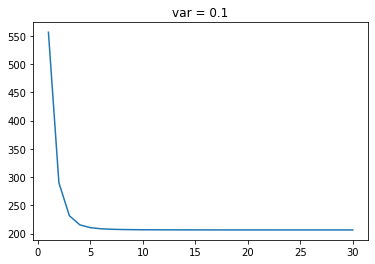

In [ ]:
print(Loss)
K = np.linspace(1,30,num=30)
plt.plot(K,Loss)
plt.title('var = %.1f' %0.1)

In [ ]:
var = 0.01
Variance = []
Loss_var = []
while var < 2.1:
  Variance.append(var)
  X = data_generator(5000,30,var)
  X = np.hstack((np.ones((5000,1)),X))
  X_test = data_generator(500,30,var)
  X_test = np.hstack((np.ones((500,1)),X_test))
  d = 30

  alpha = 0.00001

  Loss = []
  for j in range(30): # sigma^2
    k = j+1
    print('start k = ',k)
    w = np.zeros((k,d+1))
    v = np.ones((d,k+1))
    w,v = findSGD3(w,v,X,alpha,k)
    #print('w=',w,'v=',v)
    loss = AELoss(X_test,w,v,d,k)
    Loss.append(loss)
  Loss_var.append(Loss)

  var += 0.5


[[316.8313535063538, 74.08066323832777, 33.38740722897459, 24.31981341115696, 21.873296746144092, 21.719440754599713, 20.85764584358833, 20.51874224009438, 20.364222690448013, 20.284214404955204, 20.238539168766096, 20.202182881541898, 20.186834704412426, 20.176062517732074, 20.168268044401724, 20.162502036844913, 20.15817175788886, 20.154888425576463, 20.152385438900826, 20.15047323482588, 20.149013439268337, 20.147903363197816, 20.14706618322448, 20.146444367092748, 20.145995060333565, 20.14568675183854, 20.145496849771575, 20.14540996553468, 20.14541679645081, 20.145513555885973], [1510.6359438598336, 1145.0330644291678, 1067.7162226889359, 1046.0557897497465, 1038.7443106327587, 1035.8110326993194, 1034.4516247333513, 1033.759619400831, 1033.3845778888917, 1033.1713838934106, 1033.0454994089857, 1032.9692415828474, 1032.9229508156884, 1032.8962333847312, 1032.8836741721466, 1032.8826920876083, 1032.892574776766, 1032.9144196782445, 1032.9523892082882, 1033.0191462108783, 1032.19182

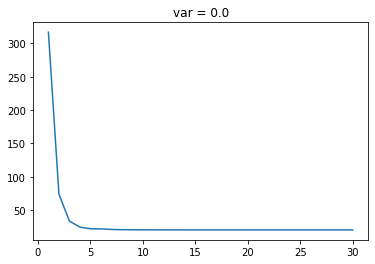

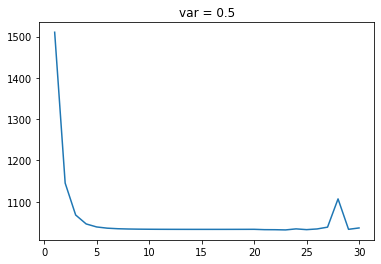

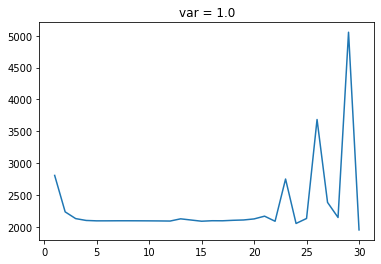

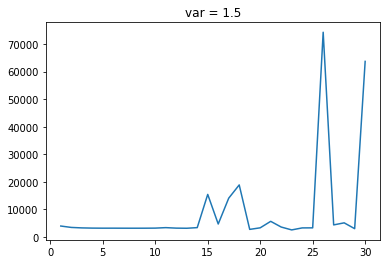

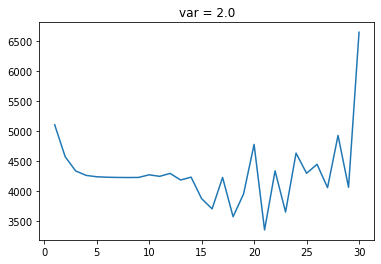

In [ ]:
print(Loss_var)
K = np.linspace(1,30,num=30)
for i in range(len(Loss_var)):
  plt.figure(i)
  plt.plot(K,Loss_var[i])
  plt.title('var = %.1f' %round(Variance[i],1))

2 PCA

In [ ]:
def Check(n,value):  # n=30
  c = value.mean() / 2
  dimension = 0
  eigenval = []
  for i in range(n):
    if value[i] >= c:
      dimension += 1
      eigenval.append(i+1)
  return dimension,eigenval

In [ ]:
for i in range(3):
  X = data_generator(5000,30,0.1)
  XT = np.transpose(X)
  XTX = XT.dot(X)
  Evalue,Evector = np.linalg.eig(XTX)
  dim,eigenval = Check(30,Evalue)
  print('try = ',i,', dim = ',dim)

try =  0 , dim =  4
try =  1 , dim =  4
try =  2 , dim =  4


In [ ]:
variance = 0
var = []
dimension = []
collection = []
while variance <= 2:
  print('start var = ',variance)
  var.append(variance)
  X = data_generator(5000,30,variance)
  XT = np.transpose(X)
  XTX = XT.dot(X)
  Evalue,Evector = np.linalg.eig(XTX)
  dim,eigenval = Check(30,Evalue)
  dimension.append(dim)
  collection.append(eigenval)
  variance = round(variance+0.1,1)

start var =  0
start var =  0.1
start var =  0.2
start var =  0.3
start var =  0.4
start var =  0.5
start var =  0.6
start var =  0.7
start var =  0.8
start var =  0.9
start var =  1.0
start var =  1.1
start var =  1.2
start var =  1.3
start var =  1.4
start var =  1.5
start var =  1.6
start var =  1.7
start var =  1.8
start var =  1.9
start var =  2.0


[[2], [1, 2, 3, 4], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6]]


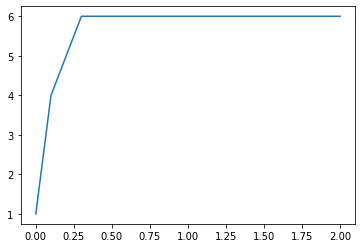

In [ ]:
print(collection)
plt.plot(var,dimension)

3 Correlation Graphs

In [227]:
def findGD(start,X,X_T,Y,alpha,terminate):
  XTX = np.matmul(X_T,X)/500
  XTY = np.matmul(X_T,Y)/500
  tol = 0
  current = start
  next = start-alpha*(np.matmul(XTX,start)-XTY)
  while np.linalg.norm(next - current) > 0.0001 and tol < terminate: 
    if isinstance(next[0], complex):
      break
    current = next
    next = current - alpha*(np.matmul(XTX,current)-XTY)
    tol += 1
  error =  pow(np.matmul(X,current)-Y,2).mean()
  return current,error

def GDdriver(X,d,alpha):    # X is 5000x30 matrix, d=30 
  W = []
  for j in range(d):
    #print('start = ',j)
    Y = X[:,j]
    temp_X = np.delete(X,j,1)
    temp_XT = np.transpose(temp_X)
    error_min = math.inf
    w_optimal = []
    for i in range(10):
      w0 = np.random.rand(d-1)
      wt,error_t = findGD(w0,temp_X,temp_XT,Y,alpha,5000)
      if error_t <= error_min: 
        w_optimal = wt
    w_optimal = np.insert(w_optimal,j,0)
    W.append(w_optimal)
  return W

In [185]:
a = np.array([[1, 1], [2, 2], [3, 3]])
np.insert(a,3,[1, 2])

array([1, 1, 2, 1, 2, 2, 3, 3])

In [ ]:
var = 0.1
d = 30
X = data_generator(5000,d,var)
alpha = 0.000001
W = GDdriver(X,d,alpha)
#print(W)

In [ ]:
Index = []
for i in range(len(W)):
  w = pd.Series(W[i])
  depend = w.nlargest(10)
  depend = depend.index.values.tolist() 
  Index.append(depend)

Index = pd.DataFrame(Index)
print(Index)

     0   1   2   3   4   5   6   7   8   9
0    1   3   2  26  13  25  18  20  28  14
1    4   0   5  27  28   8   6  17  22  12
2    5   0   9   8  17  22   3  10   6   4
3    6   0  22  23   1   2  27  17  24   8
4    1   7  18  13  16  19   2  28  22  24
5    2   8  29   1  25   7  21  20  27  23
6    3   9  16  15   8  12  23   5  28  18
7   10   4  26   1  25   9   5  14  18   8
8   11   5  15  16  24   3   2   9  19  18
9   12   6  27  19  24  29  26  25  10  14
10   7  13   3  19   4  16   6  25   0  24
11   8  14  21  22  12  27  23  13  20   7
12   9  15  11  13  28   0   1  22  18  16
13  10  16  12  17  29   1   2  26  21  15
14  11  17  19   6  16  26  28   0  10   2
15  12  18   3  24  21   2  19  26   4   5
16  13  19   4   6  14   5  27   8  10  24
17  14  20  13  27  18  21   8   9  25   3
18  15  21  17   8  22  19   4  27  25  23
19  22  16   9  13  23  15   2  17  10   5
20  17  23  28   9  26   6   4   1  22  19
21  18  24  11  20  27  28   1  16  13  15
22  19  25 

In [ ]:
var = 0.1
d = 30
X = data_generator(5000,d,var)
alpha = 0.00001
W2 = GDdriver(X,d,alpha)
#print(W2)

In [ ]:
Index2 = []
for i in range(len(W2)):
  w = pd.Series(W2[i])
  depend = w.nlargest(10)
  depend = depend.index.values.tolist() 
  Index2.append(depend)

Index2

[[3, 1, 2, 10, 23, 5, 17, 15, 19, 25],
 [0, 4, 2, 14, 21, 16, 18, 6, 7, 23],
 [5, 0, 1, 10, 11, 3, 20, 21, 24, 28],
 [6, 0, 22, 14, 9, 4, 24, 26, 23, 13],
 [1, 7, 10, 3, 5, 17, 23, 12, 22, 19],
 [2, 8, 17, 9, 25, 11, 4, 27, 26, 3],
 [3, 9, 13, 20, 15, 22, 0, 2, 11, 21],
 [10, 4, 11, 19, 25, 5, 9, 0, 24, 17],
 [5, 11, 0, 14, 22, 18, 12, 6, 20, 16],
 [12, 6, 0, 17, 5, 18, 4, 7, 19, 27],
 [13, 7, 2, 4, 25, 8, 16, 14, 18, 17],
 [14, 8, 16, 22, 5, 6, 7, 23, 17, 28],
 [9, 15, 18, 25, 8, 13, 1, 24, 20, 29],
 [10, 16, 3, 1, 7, 19, 12, 23, 5, 22],
 [17, 11, 19, 0, 8, 13, 21, 20, 18, 4],
 [12, 18, 2, 23, 19, 13, 21, 7, 17, 28],
 [19, 13, 11, 20, 6, 21, 12, 5, 29, 10],
 [20, 14, 5, 11, 9, 0, 22, 21, 15, 4],
 [21, 15, 20, 1, 22, 5, 0, 26, 13, 9],
 [16, 22, 15, 24, 1, 14, 26, 9, 7, 17],
 [17, 23, 26, 5, 15, 16, 10, 0, 28, 9],
 [18, 24, 22, 23, 16, 17, 6, 28, 27, 12],
 [19, 25, 3, 18, 13, 8, 5, 24, 20, 9],
 [20, 26, 0, 15, 9, 21, 22, 13, 11, 4],
 [21, 27, 2, 16, 22, 18, 7, 6, 26, 3],
 [28, 22, 6, 18

In [180]:
def drawDependency(Index):
  d = len(Index)
  result = []
  for i in range(3):
    dependency = [1]
    indicator = np.zeros(30)
    print('X',1)
    indicator[0] = 1
    cnt = 1
    current = Index[0][0]
    next = Index[0][i+1]
    length = 11
    if next/3 == 1:
      length = 10
    while cnt < length:
      print('-> X',next+1)
      dependency.append(next+1)
      indicator[current] = 1
      current = next
      for j in range(10): 
        if indicator[Index[current][j]] == 0: 
          next = Index[current][j]
          break
        next = 0    # back to X1
      cnt += 1
    result.append(dependency)
  return result

In [229]:
var = 0.01
d = 30
Variance = []
Results = []
while var < 2.1:
  print('start var = ',var)
  Variance.append(var)
  X = data_generator(5000,d,var)
  alpha = 0.00001
  W = GDdriver(X,d,alpha)
  Index = []
  for i in range(len(W)):
    w = pd.Series(W[i])
    depend = w.nlargest(10)
    depend = depend.index.values.tolist() 
    Index.append(depend)
  result = drawDependency(Index)
  Results.append(result)
  var = round(var+0.5,2)

start var =  0.01
X 1
-> X 27
-> X 22
-> X 21
-> X 4
-> X 10
-> X 17
-> X 16
-> X 29
-> X 12
-> X 15
X 1
-> X 10
-> X 17
-> X 16
-> X 29
-> X 22
-> X 21
-> X 4
-> X 6
-> X 15
-> X 24
X 1
-> X 17
-> X 16
-> X 29
-> X 22
-> X 21
-> X 4
-> X 10
-> X 13
-> X 9
-> X 19
start var =  0.51
X 1
-> X 16
-> X 13
-> X 21
-> X 26
-> X 15
-> X 12
-> X 18
-> X 9
-> X 6
-> X 7
X 1
-> X 27
-> X 16
-> X 13
-> X 21
-> X 26
-> X 15
-> X 12
-> X 18
-> X 9
-> X 6
X 1
-> X 18
-> X 9
-> X 6
-> X 7
-> X 10
-> X 4
-> X 3
-> X 17
-> X 11
-> X 20
start var =  1.01
X 1
-> X 10
-> X 4
-> X 25
-> X 28
-> X 22
-> X 19
-> X 16
-> X 13
-> X 3
-> X 7
X 1
-> X 20
-> X 17
-> X 4
-> X 25
-> X 28
-> X 22
-> X 19
-> X 16
-> X 13
-> X 3
X 1
-> X 6
-> X 14
-> X 17
-> X 20
-> X 22
-> X 19
-> X 16
-> X 4
-> X 25
-> X 28
start var =  1.51
X 1
-> X 3
-> X 6
-> X 25
-> X 22
-> X 19
-> X 17
-> X 20
-> X 23
-> X 24
-> X 9
X 1
-> X 4
-> X 3
-> X 6
-> X 25
-> X 22
-> X 19
-> X 17
-> X 20
-> X 23
X 1
-> X 2
-> X 5
-> X 3
-> X 6
-> X 25
